In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import mglearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

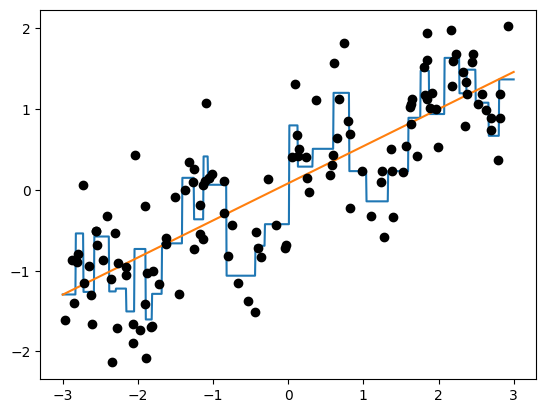

In [47]:


X,y = mglearn.datasets.make_wave(n_samples=128)
line = np.linspace(-3,3,1000, endpoint=True).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line), label="결정 트리")
reg = LinearRegression().fit(X, y)
plt.plot(line,reg.predict(line), label="결정 트리")
plt.plot(X[:,0], y,'o', c='k')

In [48]:
from sklearn.preprocessing import KBinsDiscretizer
#kb = KBinsDiscretizer(n_bins=10, strategy='uniform',encode='onehot-dense')
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print(kb.bin_edges_)

[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [49]:
X_binned = kb.transform(X)
line_bined = kb.transform(line)
X_binned.shape

(128, 10)

In [50]:
X_combined = np.hstack([X,X_binned.toarray()])
line_combined = np.hstack([line, line_bined.toarray()])
#X_product = np.hstack[[X_binned * X_binned.toarray()]]
X_combined.shape
X.shape,X_binned.shape,line_bined.shape

((128, 1), (128, 10), (1000, 10))

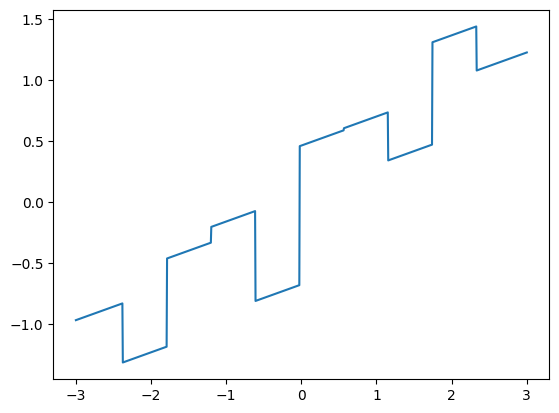

In [51]:
reg = LinearRegression().fit(X_combined,y)
plt.plot(line, reg.predict(line_combined))

In [52]:
from sklearn.preprocessing import PolynomialFeatures
#10차까지 튀기기 
poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [53]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01, ...,
         1.03097700e-01, -7.76077513e-02,  5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01, ...,
         2.86036036e+03,  7.73523202e+03,  2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00, ...,
         1.40936394e+01,  1.96178338e+01,  2.73073115e+01],
       ...,
       [-4.37353268e-01,  1.91277881e-01, -8.36560065e-02, ...,
         1.33862524e-03, -5.85452125e-04,  2.56049400e-04],
       [ 1.90808860e+00,  3.64080209e+00,  6.94697294e+00, ...,
         1.75706686e+02,  3.35263923e+02,  6.39713268e+02],
       [ 2.16438350e+00,  4.68455593e+00,  1.01391756e+01, ...,
         4.81585847e+02,  1.04233646e+03,  2.25601584e+03]])

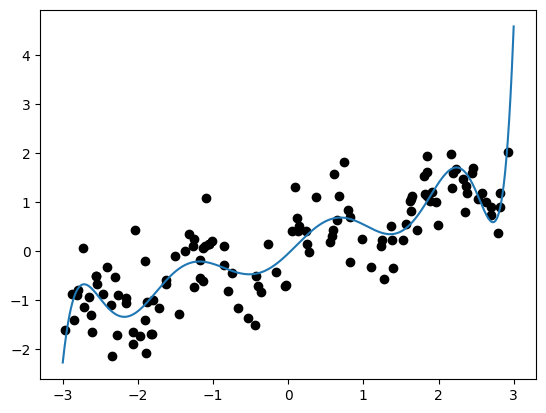

In [54]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(X[:,0], y,'o', c='k')
plt.plot(line, reg.predict(line_poly))


In [ ]:
from sklearn.datasets import load_breast_cancer
#f_classif 분류 모델에서 사용하는 친구
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

In [56]:
cancer = load_breast_cancer()

In [60]:
cancer.data.shape

(569, 30)

In [58]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])

In [62]:
X_w_noise.shape

(569, 80)

In [63]:
X_train, X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0, test_size=.5)

In [68]:
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [66]:
X_train_selected.shape

(284, 40)

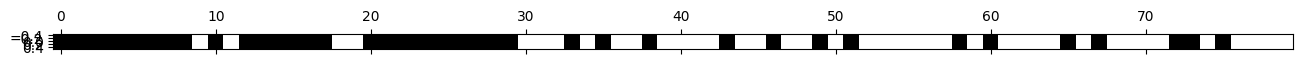

In [67]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1),cmap='gray_r')

In [70]:
# from sklearn.linear_model import LogisticRegression

# X_train_selected = select.transform(X_test)

# lr = LogisticRegression()
# lr.fit(X_train,y_train)
# print(lr.score(X_test,y_test))
# lr.fit(X_train_selected,y_train)
# print(lr.score(X_test_selected,y_test))


In [71]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)

In [72]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:",X_train.shape)
print("X_train_l1.shape",X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape (284, 40)


Text(0.5, 0, '특성 번호')

c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  func(*args, **kwargs)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  func(*args, **kwargs)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\CODE\머신러닝\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current 

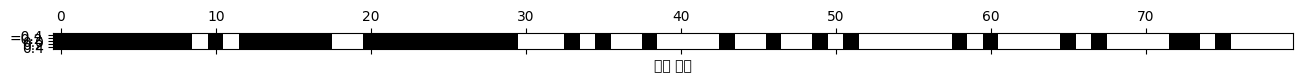

In [74]:
make = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [78]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1,y_train).score(X_test_l1, y_test)
score

0.9473684210526315